# AUTHOR: MANAS BISHT
#### College: Graphic Era Hill University, Dehradun
#### Topic: COVID PREDICTION

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# About Dataset
The dataset was provided by the Mexican government.
\
This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients.
\
- Link - ('https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico/').
- Kaggle Link - ('https://www.kaggle.com/datasets/meirnizri/covid19-dataset')

In [21]:
%%html
<style>
table{float:left}
</style>

## Insights of Dataset
In boolean feature:
|Value|Meaning|
|-|-|
| **1** | Yes |
| **2** | No |
| **98** | Missing Data|
| **97** | Missing Data|
| **99** | Missing Data|

### About columns
#### Training columns
- `USMER`: Indicates whether the patient treated medical units of the first, second or third level.
- `MEDICAL_UNIT`: type of institution of the National Health System that provided the care.
- `SEX`:
    - 1 for **female**
    - 2 for **male**.
- `PATIENT_TYPE`:type of care the patient received in the unit.
    - 1 for **returned home**
    - 2 for **hospitalization**.
- `DATE_DIED`: If the patient died indicate the date of death, and *9999-99-99 otherwise*
- `INTUBED`: whether the patient was connected to the ventilator.
- `PNEUMONIA`: whether the patient already have air sacs inflammation or not.
- `AGE`: age of patient
- `PREGNANT`: whether the patient is pregnant or not.
- `DIABETES`: whether the patient has diabetes or not.
- `ASTHMA`: whether the patient has asthma or not.
- `INMSUPR`: whether the patient is immunosuppressed or not.
- `HIPERTENSION`: whether the patient has hypertension or not.
- `OTHER_DISEASE`: whether the patient has other disease or not.
- `CARDIOVASCULAR`: whether the patient has heart or blood vessels related disease.
- `OBESITY`: whether the patient is obese or not.
- `RENAL_CHRONIC`:  whether the patient has chronic renal disease or not.
- `TOBACCO`:  whether the patient has chronic renal disease or not.
- `ICU`: Indicates whether the patient had been admitted to an Intensive Care Unit.
- `CLASIFFICATION_FINAL`:  covid test findings
    - **Values 1-3** means  the patient was diagnosed with covid in different degrees.
    - **4 or higher** means that the patient is not a carrier of covid or that the test is inconclusive

In [22]:
covid_main_data = pd.read_csv('Covid Data.csv')
covid_df = covid_main_data
covid_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [23]:
%matplotlib inline

In [24]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [25]:
covid_df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


## Dealing with Duplicate values
- Since data is large, duplicate values may present.
- So we need to remove them

In [26]:
covid_df.duplicated().sum()

812049

In [27]:
covid_df[covid_df.duplicated()]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
19,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
35,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2,2,3,97
62,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,7,2
63,2,1,2,1,9999-99-99,97,2,33,97,2,...,2,2,2,2,2,2,2,2,7,97
75,2,1,1,1,9999-99-99,97,2,24,2,2,...,2,2,2,2,2,2,2,2,7,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048556,2,13,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2,2,2,2,2,7,97
1048558,1,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048566,2,13,2,1,9999-99-99,97,2,24,97,2,...,1,2,2,2,2,2,2,2,7,97
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97


In [28]:
covid_df.drop_duplicates(inplace=True)
# Droping duplicates values

In [29]:
covid_df.duplicated().sum()

0

In [30]:
covid_df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,9999-99-99,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
1048569,1,13,1,2,9999-99-99,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97


### Done! 
All duplicate values has been removed, and we are left with **236526** rows.

## Dealing with 97,98,99 values
making these values null so that `pandas`, `seaborn` etc library functions can identify then

In [31]:
# Book_mark
# covid_df = covid_df.drop(['AGE'], axis=1).replace([97,98,99], np.NaN)
columns_to_replace = covid_df.columns[covid_df.columns != 'AGE']  # Get all columns except 'AGE'
covid_df[columns_to_replace] = covid_df[columns_to_replace].replace([97, 98, 99], np.NaN)
covid_df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,NaN,1.0,65,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,2,1,03/06/2020,NaN,1.0,72,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,2,2,09/06/2020,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,1,1,12/06/2020,NaN,2.0,53,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,2,1,21/06/2020,NaN,2.0,68,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,9999-99-99,NaN,2.0,47,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
1048569,1,13,1,2,9999-99-99,2.0,2.0,56,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0
1048571,1,13,2,2,9999-99-99,2.0,2.0,51,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0
1048572,2,13,2,1,9999-99-99,NaN,2.0,55,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN


In [32]:

covid_df.shape

(236526, 21)

In [33]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 236526 non-null  int64  
 1   MEDICAL_UNIT          236526 non-null  int64  
 2   SEX                   236526 non-null  int64  
 3   PATIENT_TYPE          236526 non-null  int64  
 4   DATE_DIED             236526 non-null  object 
 5   INTUBED               131139 non-null  float64
 6   PNEUMONIA             229339 non-null  float64
 7   AGE                   236526 non-null  int64  
 8   PREGNANT              105069 non-null  float64
 9   DIABETES              233686 non-null  float64
 10  COPD                  233997 non-null  float64
 11  ASTHMA                234020 non-null  float64
 12  INMSUPR               233600 non-null  float64
 13  HIPERTENSION          233906 non-null  float64
 14  OTHER_DISEASE         232164 non-null  float64
 15  CARD

<Axes: >

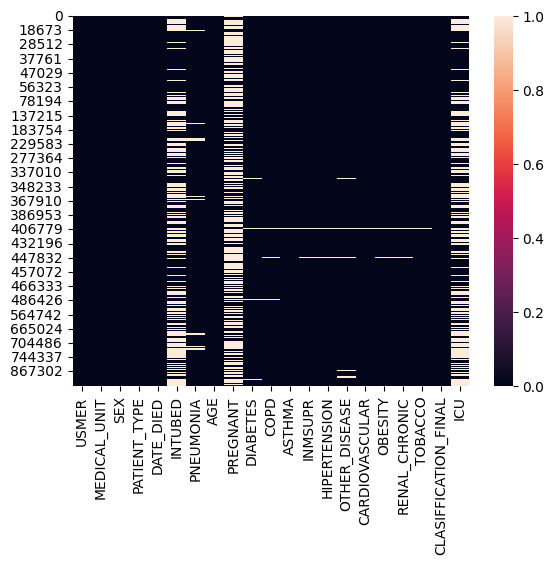

In [34]:
sns.heatmap(covid_df.isnull())

## Dealing with Target non covid !{1,2,3} values
So that we can differentiate if person had covid or not

In [35]:
covid_df['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
3    106712
7     77075
6     33629
5     10900
1      4730
2      1846
4      1634
Name: count, dtype: int64

#### Observation
**This means it contains {4,5,6,7} unwanted values.**
\
Lets replace it with **0 - assuming person results were negetive**

In [36]:
# Book_mark
replace_list = [4,5,6,7]
covid_df['CLASIFFICATION_FINAL'].replace(replace_list, 0, inplace=True)
covid_df['CLASIFFICATION_FINAL'].value_counts()

C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_13948\280413404.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  covid_df['CLASIFFICATION_FINAL'].replace(replace_list, 0, inplace=True)


CLASIFFICATION_FINAL
0    123238
3    106712
1      4730
2      1846
Name: count, dtype: int64

## Dealing with `DATE_DIED` columns
Right now, we are not interested in date of death, instead we are interested in wheather the person died or not
\
So we will be converting `DATE_DIED` column into 0's and 1's

Date|Meaning|New code|
-|-|-|
99/99/9999 | Alive | 1 |
Any other date | Dead | 0 | 

In [37]:
died_count = covid_df['DATE_DIED'][covid_df['DATE_DIED']=='9999-99-99'].count()
died_count

160561

In [38]:
alive_count = covid_df['DATE_DIED'][covid_df['DATE_DIED']!='9999-99-99'].count()
alive_count

75965

In [39]:
# {Warning} Change Database
# Book_mark
covid_df['DATE_DIED'].replace('9999-99-99', 1, inplace=True)
covid_df['DATE_DIED'].replace(r'(\d{2})/(\d{2})/(\d{4})', 0, regex=True, inplace=True)
covid_df.rename(columns={"DATE_DIED":"SURVIVED"}, inplace=True)

C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_13948\3096967052.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  covid_df['DATE_DIED'].replace('9999-99-99', 1, inplace=True)
C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_13948\3096967052.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [40]:
covid_df['SURVIVED'].value_counts()

SURVIVED
1    160561
0     75965
Name: count, dtype: int64

# Final changes
- All 97 and 99 (missing values code) has been replaced with np.NaN (NULL) values, to let other libraries work on them
- Columns `CLASIFFICATION_FINAL` has now:
    -  **{1,2,3}** : degree of covid virus.
    -  **{0}** :  Negetive result
 
-----------------

# Target Column
- `SURVIVED`: Columns has binary data:
    -  **0** : Dead
    -  **1** : Alive

-------------

# Now Dealing with Missing values


<Axes: >

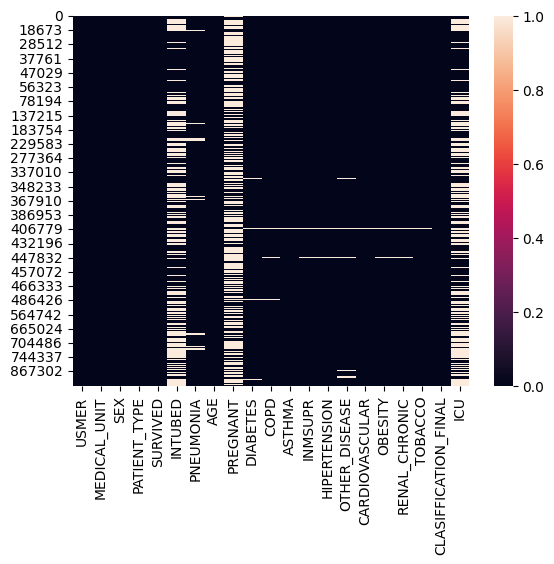

In [41]:
sns.heatmap(covid_df.isnull())

In [42]:
def missing_value_percentage(column):
    return ((covid_df.shape[0] - covid_df[column].count())/covid_df.shape[0]) * 100

In [43]:
covid_df.shape[0]

236526

In [44]:
missing_value_percentage('INTUBED')

44.55620100961416

In [45]:
missing_value_percentage('PREGNANT')

55.578245097790514

In [46]:
missing_value_percentage('ICU')

44.619196198303776

#### `INTUBED` AND `ICU`AND `PREGNANT` HAS ALOT MISSING DATA 
So its worth checking if the data has any coorelations with our target column or not

<Axes: >

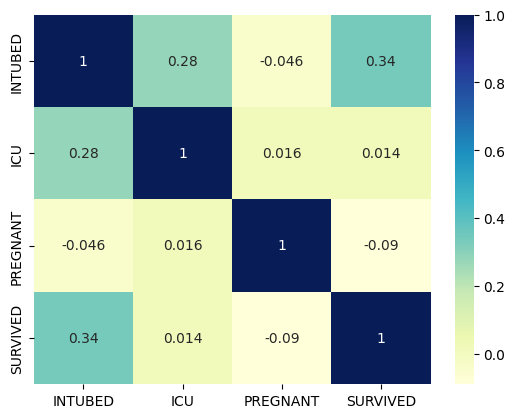

In [47]:
sns.heatmap(covid_df[['INTUBED', 'ICU', 'PREGNANT', 'SURVIVED']].corr(), cmap='YlGnBu', annot=True)

### Observation
The observations from map is
1. Columns `ICU` and `PREGNANT` are least coorelated with **Target variable** `SURVIVED`.
2. However, `INTUBED` column shows **GOOD** coorelation.
3. But due to large missing data in `INTUBED`, Imputation in this column may be complex

## Decision
- Since `PREGNANT` and  `ICU` have around than **45-55% of data missing** and there coorelation is also not good, **we can drop these columns**.
- `INTUBED` also has around **44% missing data** but is highly coorelated with **Target column**, Hence **It needs to be IMPUTED**
- While other columns with `DIABETES`, `COPD`, `OTHER_DISEASE` etc have less than 5% data missing, so it will be imputed by Simple mean strategy 

In [48]:
# {Warning: Dont run it more than once}
# Book_mark
covid_df.drop(['ICU', 'PREGNANT'], axis=1, inplace=True)

In [49]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 236526 non-null  int64  
 1   MEDICAL_UNIT          236526 non-null  int64  
 2   SEX                   236526 non-null  int64  
 3   PATIENT_TYPE          236526 non-null  int64  
 4   SURVIVED              236526 non-null  int64  
 5   INTUBED               131139 non-null  float64
 6   PNEUMONIA             229339 non-null  float64
 7   AGE                   236526 non-null  int64  
 8   DIABETES              233686 non-null  float64
 9   COPD                  233997 non-null  float64
 10  ASTHMA                234020 non-null  float64
 11  INMSUPR               233600 non-null  float64
 12  HIPERTENSION          233906 non-null  float64
 13  OTHER_DISEASE         232164 non-null  float64
 14  CARDIOVASCULAR        233923 non-null  float64
 15  OBES

<Axes: >

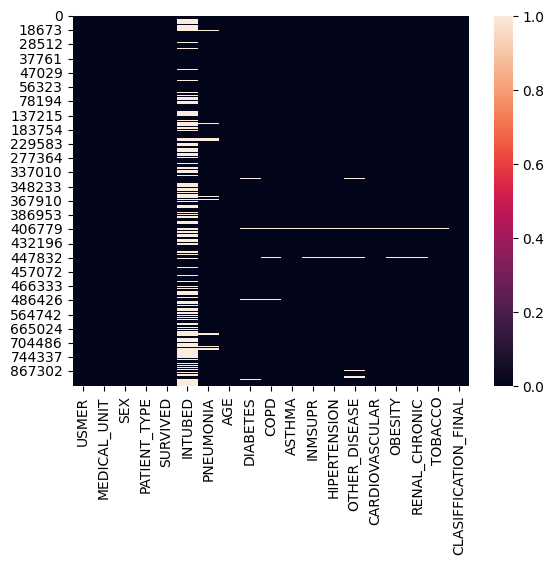

In [50]:
sns.heatmap(covid_df.isnull())

# Unwanted columns droped successfully
Columns `ICU`, AND `PREGNANT` dropped successfully


# Data Imputation
For now to impute `PNEUMONIA`, `DIABETES`, `COPD`, `OTHER_DISEASE` and other columns having less data missing can be imputed using simple **Mean strategy**.

In [51]:
# Book_mark
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
# # covid_df['PNEUMONIA'] = imputer.fit_transform(covid_df[['PNEUMONIA']])
lst_columns_after_age = list(covid_df.loc[:, 'PNEUMONIA':])

for cols in lst_columns_after_age:
    covid_df[cols] = imputer.fit_transform(covid_df[[cols]])

#### Imputing `INTUBED`

In [52]:
catcols = list(covid_df.columns)
catcols.remove('SURVIVED')
catcols

['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'INTUBED',
 'PNEUMONIA',
 'AGE',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL']

<Axes: >

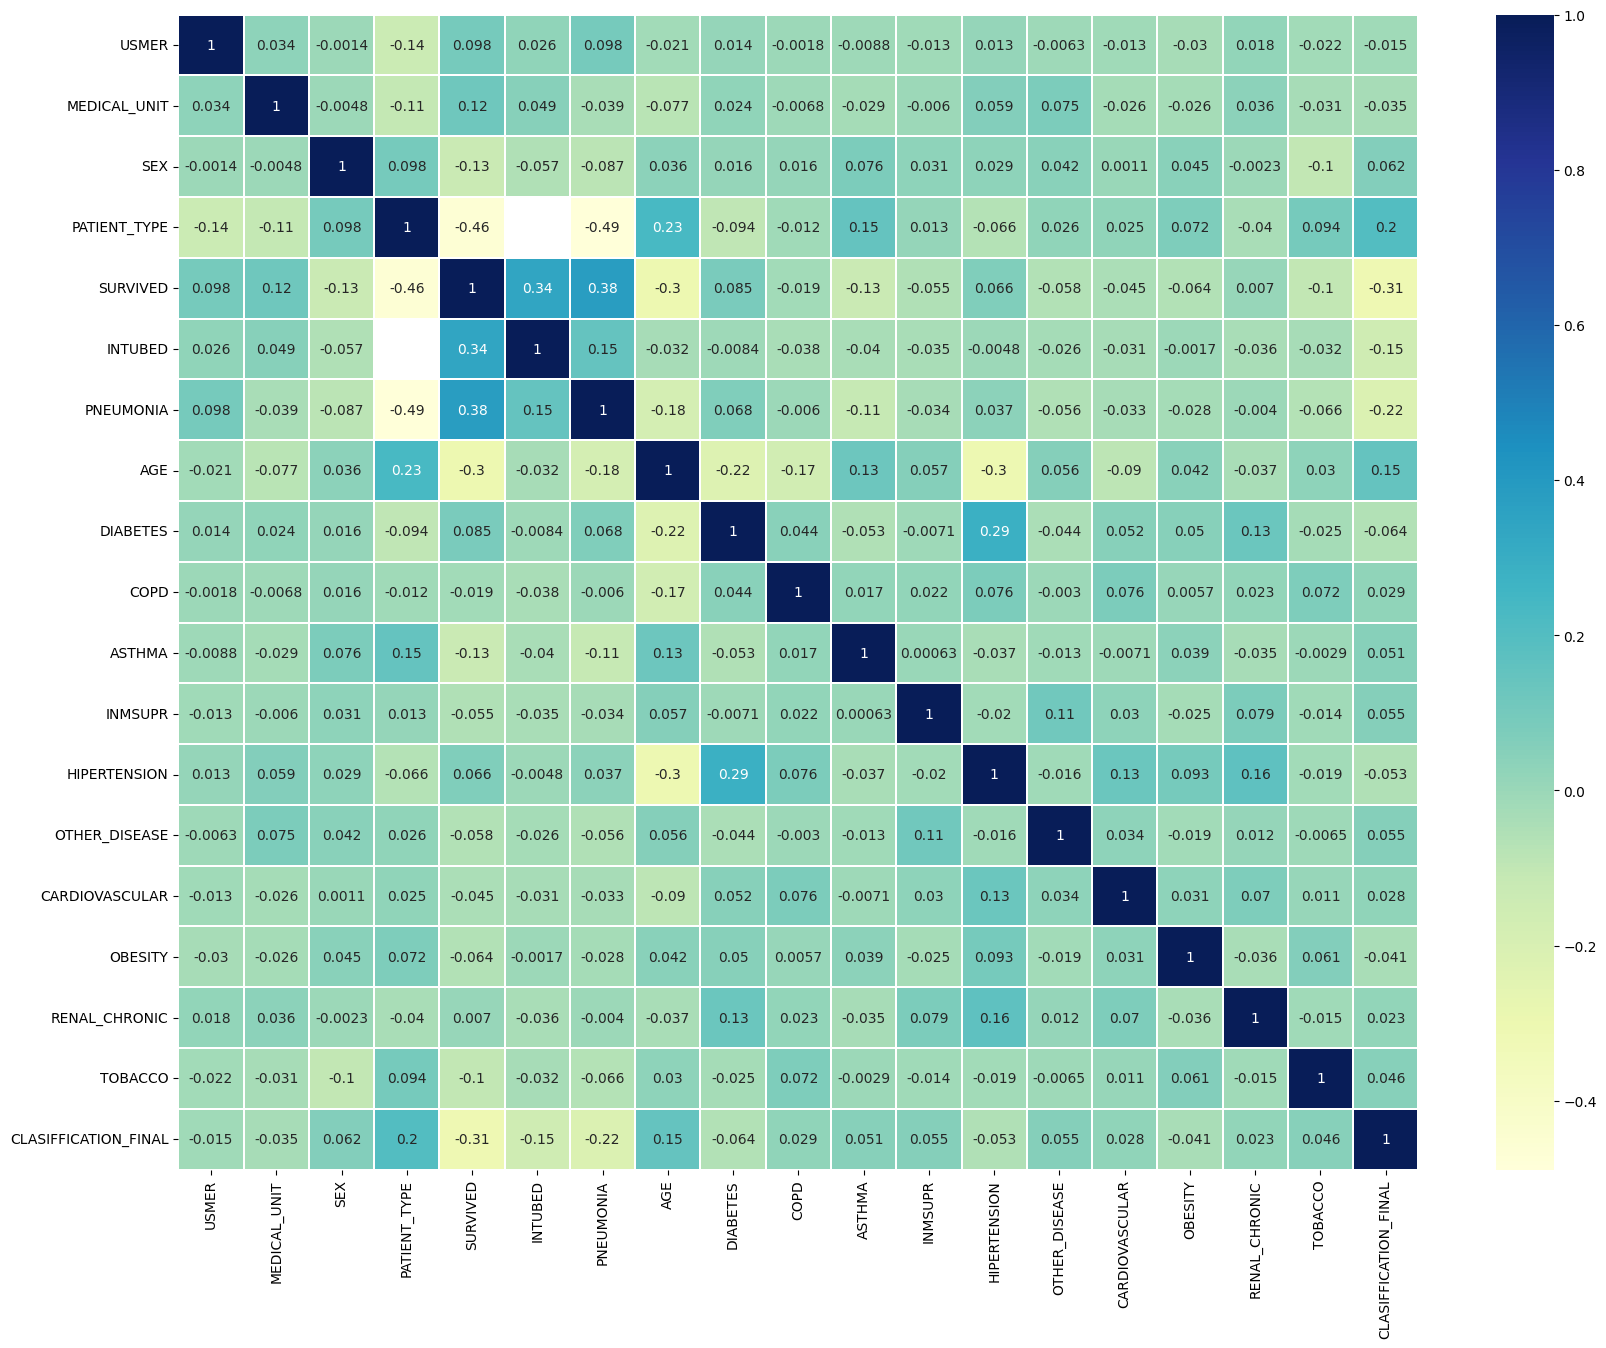

In [53]:
# for col in catcols:
#     plt.figure(figsize=(5,2.5))
#     sns.boxplot(x=covid_df[col], y=covid_df['INTUBED'], data=covid_df)
plt.subplots(figsize=(20,15))
sns.heatmap(covid_df.corr(), cmap='YlGnBu', annot=True, linewidths=0.1)

# Applying Simple mean in `INTUBED` right now... will apply complex soon 

In [54]:
covid_df['INTUBED'] = imputer.fit_transform(covid_df[['INTUBED']])

<Axes: >

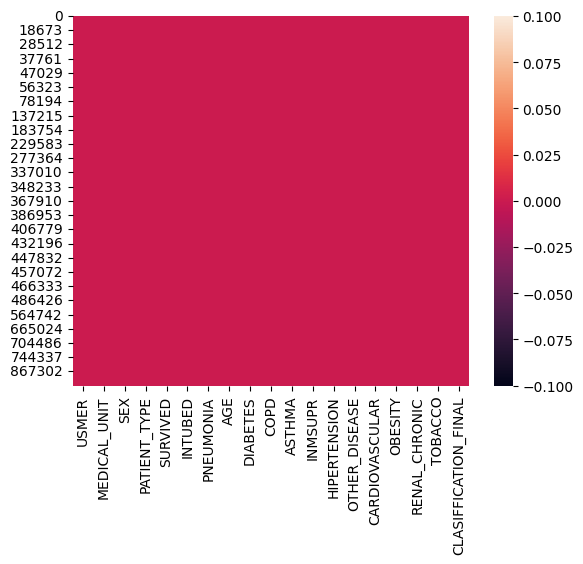

In [55]:
sns.heatmap(covid_df.isnull())

In [56]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 236526 non-null  int64  
 1   MEDICAL_UNIT          236526 non-null  int64  
 2   SEX                   236526 non-null  int64  
 3   PATIENT_TYPE          236526 non-null  int64  
 4   SURVIVED              236526 non-null  int64  
 5   INTUBED               236526 non-null  float64
 6   PNEUMONIA             236526 non-null  float64
 7   AGE                   236526 non-null  float64
 8   DIABETES              236526 non-null  float64
 9   COPD                  236526 non-null  float64
 10  ASTHMA                236526 non-null  float64
 11  INMSUPR               236526 non-null  float64
 12  HIPERTENSION          236526 non-null  float64
 13  OTHER_DISEASE         236526 non-null  float64
 14  CARDIOVASCULAR        236526 non-null  float64
 15  OBES

### Data Imputation successfull
As we can see in seaborn map that now there are **No null values left**

-------------------

# Data cleaning
Now, I will be only keeping Important columns in our dataset, i.e. **The columns with good coorelations (negetive or positive)**, rest columns may only  overfit the process in future, Hence they will be dropped

In [57]:
# Shifting DIED col to last index
died_col = covid_df['SURVIVED']
covid_df.drop(['SURVIVED'], axis=1, inplace=True)
covid_df['SURVIVED'] = died_col
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 236526 non-null  int64  
 1   MEDICAL_UNIT          236526 non-null  int64  
 2   SEX                   236526 non-null  int64  
 3   PATIENT_TYPE          236526 non-null  int64  
 4   INTUBED               236526 non-null  float64
 5   PNEUMONIA             236526 non-null  float64
 6   AGE                   236526 non-null  float64
 7   DIABETES              236526 non-null  float64
 8   COPD                  236526 non-null  float64
 9   ASTHMA                236526 non-null  float64
 10  INMSUPR               236526 non-null  float64
 11  HIPERTENSION          236526 non-null  float64
 12  OTHER_DISEASE         236526 non-null  float64
 13  CARDIOVASCULAR        236526 non-null  float64
 14  OBESITY               236526 non-null  float64
 15  RENA

<Axes: >

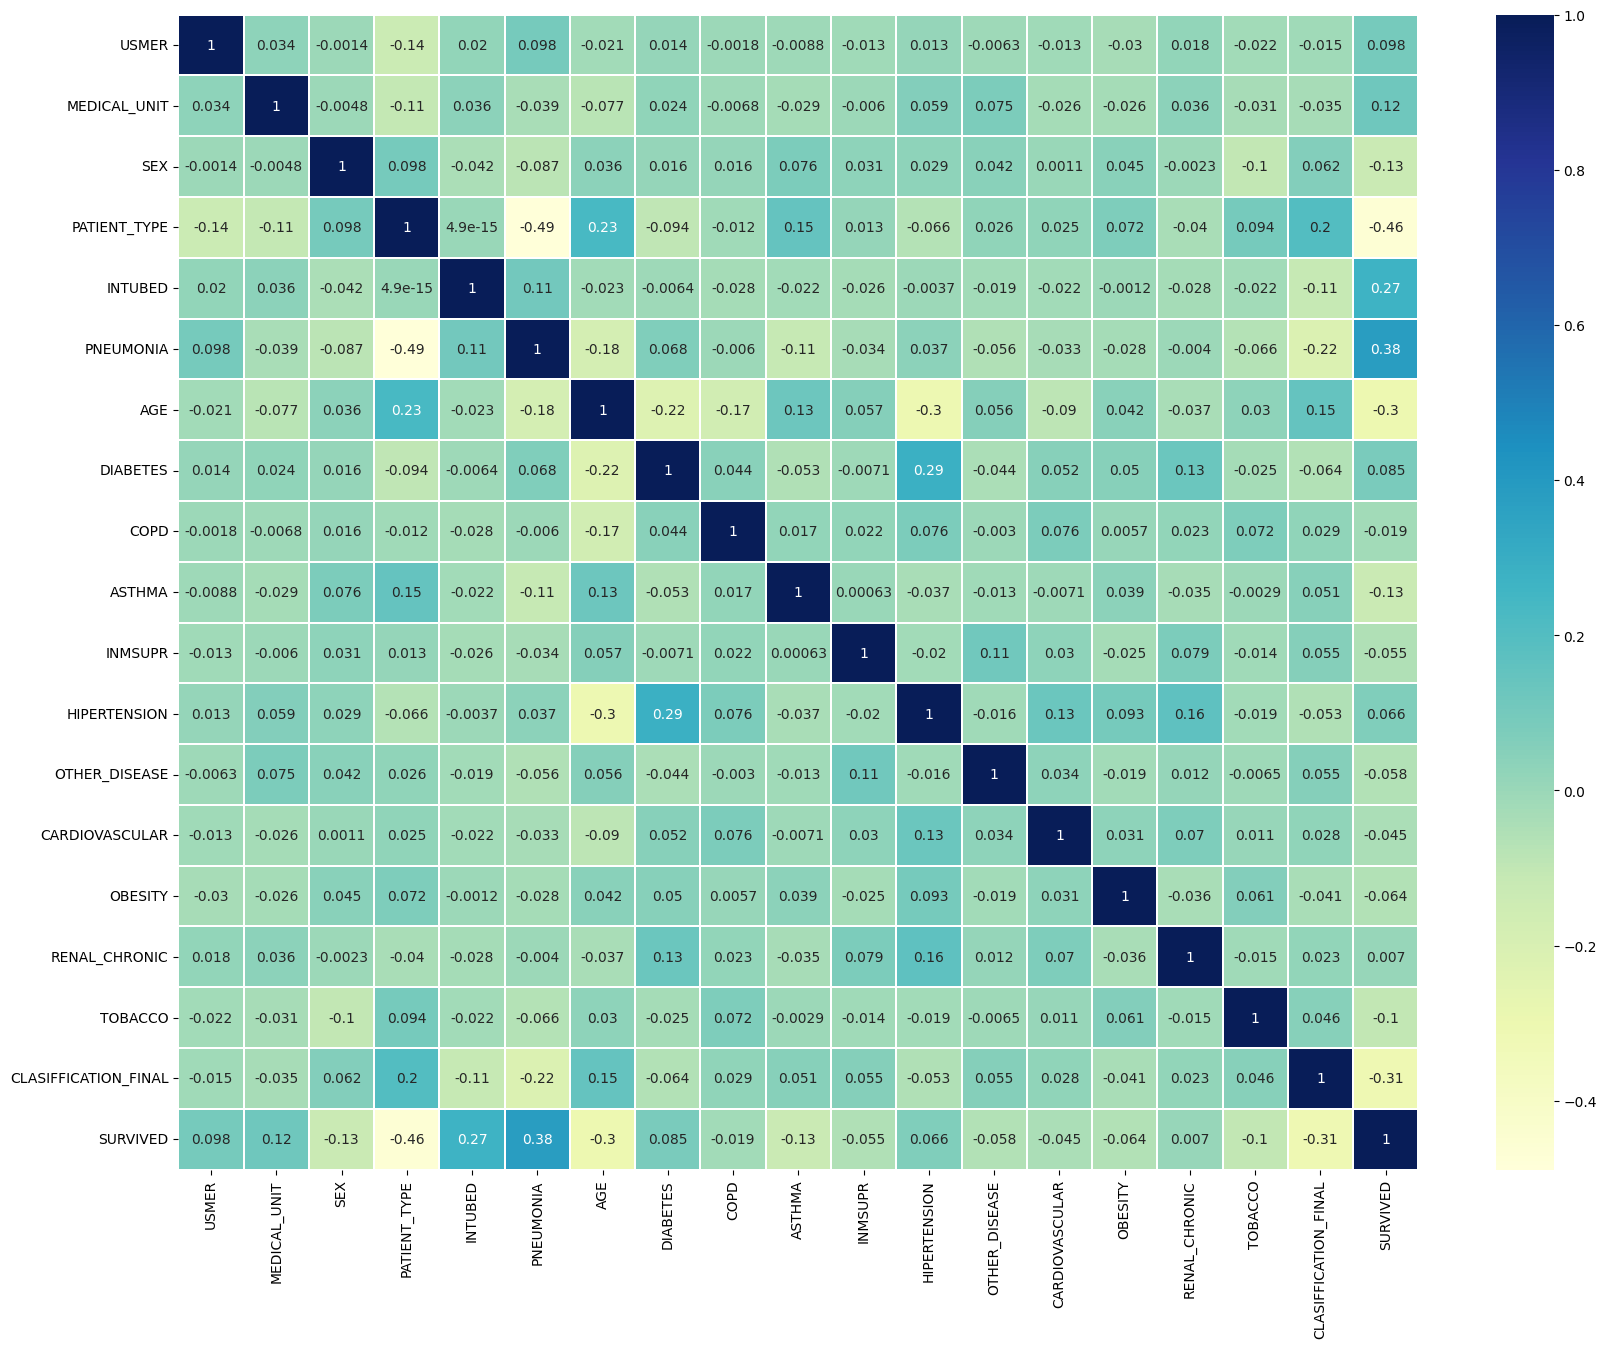

In [58]:
plt.subplots(figsize=(20,15))
sns.heatmap(covid_df.corr(), cmap='YlGnBu', annot=True, linewidths=0.1)

# Final Dataset
There are many columns with Good coorelation with target variable `SURVIVED`.
\
However Some columns like:
- `COPD`
- `RENAL_CHRONIC`
\
Don't seem to have much coorelation, hence they can be **dropped**.

In [59]:
# Book_mark
covid_df.drop(['COPD', 'RENAL_CHRONIC'], 
              axis=1, inplace=True)

In [60]:
covid_df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,TOBACCO,CLASIFFICATION_FINAL,SURVIVED
0,2,1,1,1,1.753735,1.0,65.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,0
1,2,1,2,1,1.753735,1.0,72.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,0
2,2,1,2,2,1.000000,2.0,55.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,0
3,2,1,1,1,1.753735,2.0,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0
4,2,1,2,1,1.753735,2.0,68.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,1.753735,2.0,47.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1
1048569,1,13,1,2,2.000000,2.0,56.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1
1048571,1,13,2,2,2.000000,2.0,51.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1
1048572,2,13,2,1,1.753735,2.0,55.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1


In [61]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 236526 non-null  int64  
 1   MEDICAL_UNIT          236526 non-null  int64  
 2   SEX                   236526 non-null  int64  
 3   PATIENT_TYPE          236526 non-null  int64  
 4   INTUBED               236526 non-null  float64
 5   PNEUMONIA             236526 non-null  float64
 6   AGE                   236526 non-null  float64
 7   DIABETES              236526 non-null  float64
 8   ASTHMA                236526 non-null  float64
 9   INMSUPR               236526 non-null  float64
 10  HIPERTENSION          236526 non-null  float64
 11  OTHER_DISEASE         236526 non-null  float64
 12  CARDIOVASCULAR        236526 non-null  float64
 13  OBESITY               236526 non-null  float64
 14  TOBACCO               236526 non-null  float64
 15  CLAS

# Dataset Ready!
This dataset conains most coorelated features with Target column, with all integer and float type.
\
Now similar dataset will be implemented for next jupyter file using pipeline processes **For Training and Predictions**

-----------------------

# Covid_Test.csv and Covid_Train.csv
Since dataset is large enough with almost **10 lakh dataset**, I will be dividing **2 lakh data** from tail of dataset into **Test.csv**, For Evalutation of Model and **Train.csv**, is what i will be using for my Algorithm training purpose
\
Since Data is randomly distributed, I am going to use **StratifiedShuffleSplit** to split them good ratio of both output

In [62]:
covid_df.tail(5000)['SURVIVED'].value_counts()

SURVIVED
1    4939
0      61
Name: count, dtype: int64

In [63]:
from sklearn.model_selection import StratifiedShuffleSplit

In [64]:
spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.4)

for train_ind, test_ind in spliter.split(covid_df, covid_df[['SURVIVED']]):
    strat_test_set = covid_df.iloc[test_ind]
    strat_train_set = covid_df.iloc[train_ind]

strat_train_set


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,TOBACCO,CLASIFFICATION_FINAL,SURVIVED
717310,2,12,1,2,2.000000,1.0,49.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1
41303,2,4,2,2,2.000000,1.0,73.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,0
445848,1,12,2,1,1.753735,2.0,72.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,0
42111,2,4,1,1,1.753735,2.0,49.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0
475845,1,12,2,1,1.753735,2.0,26.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229826,2,4,2,1,1.753735,2.0,57.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,1
323208,2,4,2,2,2.000000,2.0,29.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,1
180737,2,4,1,2,2.000000,2.0,53.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,1
159409,2,4,1,1,1.753735,2.0,29.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1


<Axes: >

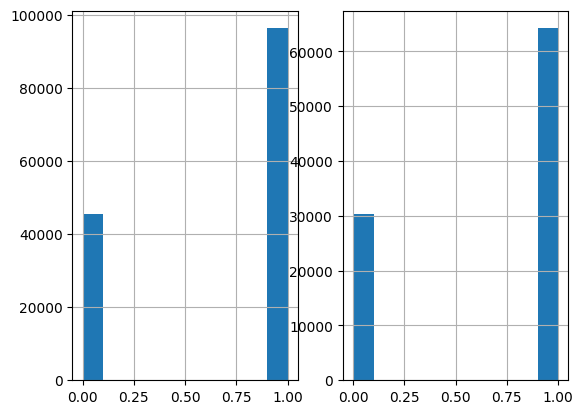

In [65]:
plt.subplot(1,2,1)
strat_train_set['SURVIVED'].hist()

plt.subplot(1,2,2)
strat_test_set['SURVIVED'].hist()


In [66]:
strat_train_set.to_csv('Covid_train.csv', index=False)
strat_test_set.to_csv('Covid_test.csv', index=False)